<a href="https://colab.research.google.com/github/ShrutiJain456/compute/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About dataset and the task
This is a Glass Identification Data Set from UCI. It contains the following attributes:
1. RI: refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron

The 10th attribute which is the target label has been dropped as it contained the label for different glass types. Your task is to apply K-Means on the givn dataset to find the number of glass types present in the dataset. 

The error of **`+/-1`** in the calculated number of glass is allowed

# Importing Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/content/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


Dataset has no null values

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


**There is variation in the magnitude of the data, which can be seen by the mean values of the elements**
**Hence we will scale the data**

# Pre-processing

* Create object of StandardScaler
* apply `fit_transform` on the dataset and store the data in the new variable `data_scaled`

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


Now the data of of same scale and we can apply K-Means on this scaled data

# Applying K-Means

* Set the value of k (`n_clusters`) as 2
* Create object of kmeans function with initialization (`init`) as `k-means++`

In [ ]:
k = 2
kmeans = KMeans(init = "k-means++",
                        n_clusters = k,
                        random_state = 0) 

kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=0)

Print the inertia of the two clusters (Hint: use the attribute `inertia_` of kmeans object )

In [ ]:
# find inertia here
kmeans.inertia_

1526.2793711914971

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
inertia_list = []
for cluster in range(1, 16): # 1...15 clusters
    kmeans = KMeans(n_clusters= cluster, init = 'k-means++')
    kmeans.fit(data_scaled)
    
    temp_inertia = kmeans.inertia_
    inertia_list.append(temp_inertia)

Text(0, 0.5, 'Inertia')

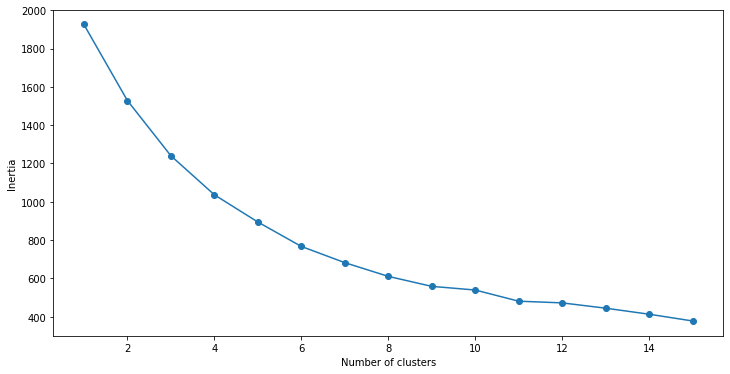

In [ ]:
# plotting the inerta values for clusters of various sizes
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

**What is the appropriate value for the number of clusters according to the above plot?**

**Ans:** *Number of clusters (No. of glass types)* = 13________

* Create kmeans object with the identified number of clusters and init as `k-means++`
* fit the model
* use predict method on scaled data to find the number of points belonging to the specific clusters

In [ ]:
kmeans = KMeans(n_clusters = 13, init= 'k-means++', random_state = 0)

kmeans.fit(data_scaled)

pred = kmeans.predict(data_scaled)

In [ ]:
pred = pd.Series(pred)

**Find the number of pontints in each cluster using `value_counts()` on `pred`**

In [ ]:
"""
Find number of pontints in each cluster here
"""
pred.value_counts()

1     74
0     31
5     23
7     20
9     15
11    14
3     14
2     11
8      6
6      2
4      2
10     1
12     1
dtype: int64